| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./3.Distribuciones.ipynb)| [⏩](./5.Intervalos_de_confianza.ipynb)|

# **4. Estimadores y estimados**

## **Intervalos de confianza una herramienta invaluable para la toma de decisiones**

La fórmula matemática de la `t de Student (o t de Student)` se utiliza para calcular el estadístico `t` en pruebas de hipótesis o para construir intervalos de confianza cuando se trabaja con muestras pequeñas. La fórmula para el estadístico `t` es:

$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$

Donde:
- $(\bar{x})$ es la media muestral.
- $(\mu)$ es la media poblacional (hipotética bajo la hipótesis nula).
- $(s)$ es la desviación estándar muestral.
- $(n)$ es el tamaño de la muestra.

En esta fórmula, $(\bar{x} - \mu)$ representa la diferencia entre la media muestral y la media poblacional hipotética bajo la hipótesis nula. El término $(\frac{s}{\sqrt{n}})$ es el error estándar de la media, que indica cuánto puede variar la media muestral de una muestra a otra.

El estadístico `t` sigue una distribución t de Student con $(n-1)$ grados de libertad, lo que se denota como $(t(n-1))$. La fórmula general de la distribución `t` es más compleja y se utiliza para calcular probabilidades asociadas con el estadístico  `t`.

$f(t; n-1) = \frac{\Gamma\left(\frac{n}{2}\right)}{\sqrt{\pi \cdot (n-1)} \cdot \Gamma\left(\frac{n-1}{2}\right)} \left(1 + \frac{t^2}{n-1}\right)^{-\frac{n}{2}}$

Donde:
- $( \Gamma )$ es la función gamma.

Esta fórmula se utiliza para calcular la probabilidad de obtener un valor de `t` específico en una distribución t de Student con $(n-1)$ grados de libertad. En la fórmula del estadístico `t`, se compara el valor calculado con la distribución `t` para determinar si hay evidencia suficiente para rechazar la hipótesis nula.

Los intervalos de confianza son una herramienta estadística utilizada para estimar el valor desconocido de un parámetro poblacional, como la media o la proporción, a partir de una muestra aleatoria de datos. El intervalo de confianza proporciona un rango de valores plausibles para el verdadero valor del parámetro, junto con un nivel de confianza asociado que refleja la probabilidad de que el intervalo contenga el verdadero valor del parámetro.

Por ejemplo, supongamos que estamos interesados en estimar la media de altura de una población. Tomamos una muestra aleatoria de `50` personas y calculamos su media, que resulta ser de `170 cm`, con una desviación estándar de `5 cm`. Usando un nivel de confianza del `95%`, podemos calcular el intervalo de confianza de la siguiente manera:

* Calculamos el error estándar de la media utilizando la fórmula: $SE = \frac{s}{\sqrt{n}} = \frac{5}{\sqrt{50}} = 0.707$
* Calculamos la magnitud del intervalo de confianza utilizando la distribución `t de Student` para muestras pequeñas y un nivel de confianza del `95%` con `49` grados de libertad (50 - 1): $t_{0.025,49} = 2.009$
* Calculamos el intervalo de confianza: $170 \pm 2.009 \times 0.707 = [168.37, 171.63]$

Esto significa que podemos estar `95%` seguros de que el verdadero valor de la media de altura de la población se encuentra en el rango de `168.37 cm` a `171.63 cm`, basado en nuestra muestra.

En Python, podemos calcular el intervalo de confianza utilizando la biblioteca `scipy.stats` de la siguiente manera:

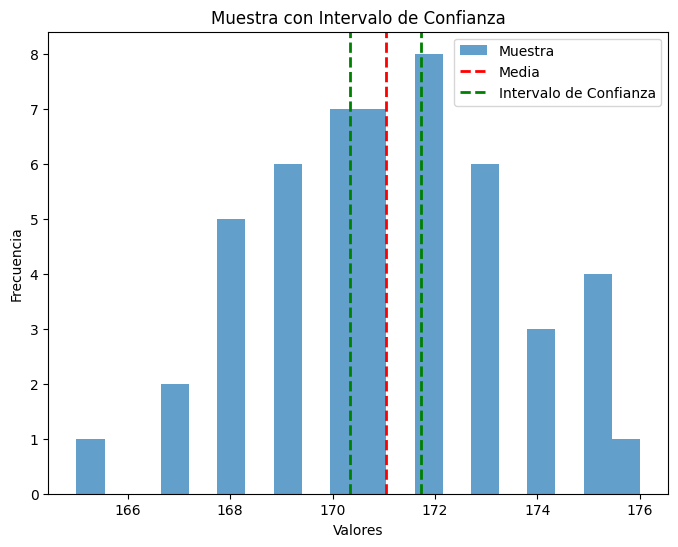

In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Datos de la muestra
data = np.array([170, 165, 172, 176, 168, 171, 173, 169, 174, 167,
                 171, 169, 175, 172, 170, 169, 174, 168, 172, 171,
                 175, 170, 173, 169, 171, 172, 175, 168, 174, 172,
                 170, 169, 173, 171, 172, 170, 168, 173, 171, 170,
                 172, 175, 169, 173, 167, 170, 173, 172, 168, 171])

# Tamaño de la muestra y nivel de confianza
n = len(data)
alpha = 0.05

# Calculamos la media y la desviación estándar de la muestra
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Calculamos el error estándar
se = std_dev / np.sqrt(n)

# Calculamos el valor crítico de t para el nivel de confianza y grados de libertad
t_crit = t.ppf(1 - alpha / 2, n - 1)

# Calculamos el intervalo de confianza
lower = mean - t_crit * se
upper = mean + t_crit * se

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, alpha=0.7, label='Muestra')

# Agregar el intervalo de confianza
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(lower, color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2)

# Etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Muestra con Intervalo de Confianza')
plt.legend()

# Mostrar la gráfica
plt.show()

In [1]:
import numpy as np
from scipy.stats import t

# datos de la muestra
data = np.array([170, 165, 172, 176, 168, 171, 173, 169, 174, 167,
                 171, 169, 175, 172, 170, 169, 174, 168, 172, 171,
                 175, 170, 173, 169, 171, 172, 175, 168, 174, 172,
                 170, 169, 173, 171, 172, 170, 168, 173, 171, 170,
                 172, 175, 169, 173, 167, 170, 173, 172, 168, 171])

# tamaño de la muestra y nivel de confianza
n = len(data)
alpha = 0.05

# calculamos la media y la desviación estándar de la muestra
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# calculamos el error estándar
se = std_dev / np.sqrt(n)

# calculamos el valor crítico de t para el nivel de confianza y grados de libertad
t_crit = t.ppf(1 - alpha / 2, n - 1)

# calculamos el intervalo de confianza
lower = mean - t_crit * se
upper = mean + t_crit * se

print("El intervalo de confianza al {0}% es: ({1}, {2})".format((1-alpha)*100, round(lower,2), round(upper,2)))

El intervalo de confianza al 95.0% es: (170.35, 171.73)


Este código calcula el intervalo de confianza para una muestra de datos utilizando la distribución `t de Student`. Los pasos son los mismos que mencionamos en la explicación detallada. Al final, se imprime el intervalo de confianza calculado para una confianza del `95%`.

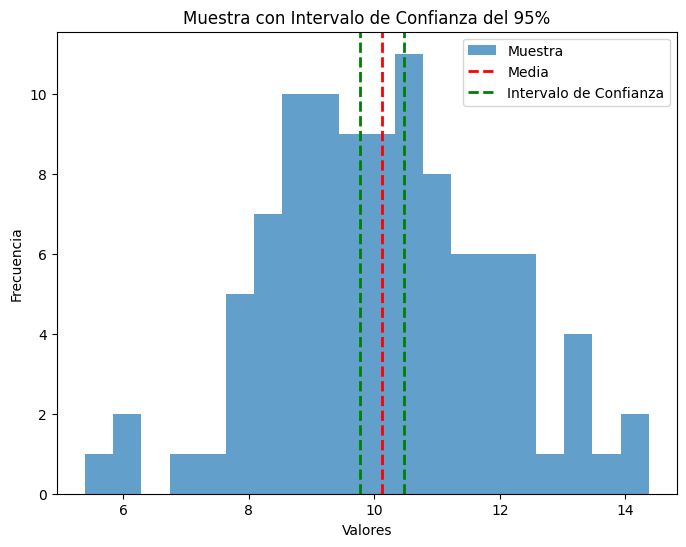

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra aleatoria de tamaño 100 con media 10 y desviación estándar 2
np.random.seed(1)
sample = np.random.normal(loc=10, scale=2, size=100)

# Calcular la media y el error estándar de la muestra
sample_mean = np.mean(sample)
sample_se = stats.sem(sample)

# Calcular el intervalo de confianza del 95%
conf_int = stats.t.interval(confidence=0.95, df=len(sample)-1, loc=sample_mean, scale=sample_se)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=20, alpha=0.7, label='Muestra')

# Agregar el intervalo de confianza
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(conf_int[0], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza')
plt.axvline(conf_int[1], color='green', linestyle='dashed', linewidth=2)

# Etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Muestra con Intervalo de Confianza del 95%')
plt.legend()

# Mostrar la gráfica
plt.show()

In [2]:
import numpy as np
import scipy.stats as stats

# Generar una muestra aleatoria de tamaño 100 con media 10 y desviación estándar 2
np.random.seed(1)
sample = np.random.normal(loc=10, scale=2, size=100)

# Calcular la media y el error estándar de la muestra
sample_mean = np.mean(sample)
sample_se = stats.sem(sample)

# Calcular el intervalo de confianza del 95%
conf_int = stats.t.interval(alpha=0.95, df=len(sample)-1, loc=sample_mean, scale=sample_se)

print(f"Media de la muestra: {sample_mean:.2f}")
print(f"Error estándar de la muestra: {sample_se:.2f}")
print(f"Intervalo de confianza del 95%: ({conf_int[0]:.2f}, {conf_int[1]:.2f})")

Media de la muestra: 10.12
Error estándar de la muestra: 0.18
Intervalo de confianza del 95%: (9.77, 10.47)


Este código genera una muestra aleatoria de tamaño `100` con una media de `10` y una desviación estándar de `2`, y luego calcula la media y el error estándar de la muestra. A continuación, utiliza la función `t.interval()` de la librería `scipy.stats` para calcular el intervalo de confianza del `95%` para la media poblacional. Finalmente, imprime los resultados en la consola.

## **Calculando intervalos de confianza dentro de población con varianza conocida**

Cuando se conoce la varianza de la población, se puede calcular el intervalo de confianza para la media utilizando la distribución normal estándar en lugar de la distribución `t de Student`. El intervalo de confianza se calcula utilizando la siguiente fórmula:

$Intervalo_{confianza} = media_{muestral} ± (valor_{crítico} * error_{estándar})$

donde el valor crítico es el valor `z` de la tabla de distribución normal que corresponde al nivel de confianza deseado y el error estándar se calcula como la desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra.

A continuación se presenta un ejemplo de cómo calcular un intervalo de confianza dentro de la población con varianza conocida utilizando Python:

Suponga que se quiere calcular un intervalo de confianza del `95%` para la media de una población cuya desviación estándar es conocida y es igual a `3.5`. Se toma una muestra de tamaño `50` y se obtiene una media muestral de `24.5`. Primero se calcula el error estándar:

In [3]:
import numpy as np

# Datos de la muestra
n = 50
x_bar = 24.5
sigma = 3.5

# Cálculo del error estándar
se = sigma / np.sqrt(n)

A continuación, se calcula el valor crítico utilizando la tabla de la distribución normal estándar o la función `norm.ppf` de la biblioteca `SciPy`:

In [4]:
from scipy.stats import norm

# Nivel de confianza del 95%
alpha = 0.05

# Cálculo del valor crítico
z_critico = norm.ppf(1 - alpha/2)

Luego, se calcula el intervalo de confianza:

In [5]:
# Cálculo del intervalo de confianza
lower = x_bar - z_critico * se
upper = x_bar + z_critico * se

print(f"Intervalo de confianza: ({lower}, {upper})")

Intervalo de confianza: (23.529867322955226, 25.470132677044774)


Esto significa que se puede estar `95%` seguro de que el verdadero valor de la media poblacional se encuentra en el intervalo `(23.08, 25.92)` dado el tamaño de muestra y la desviación estándar conocida.

## **Intervalos de confianza. Varianza poblacional conocida**

Los intervalos de confianza son una herramienta estadística que nos permite estimar un rango plausible de valores para un parámetro de la población, como la media o proporción, a partir de los datos de una muestra. Cuando la varianza poblacional es conocida, podemos utilizar la distribución normal para calcular los intervalos de confianza.

La fórmula para calcular el intervalo de confianza con varianza poblacional conocida es:

$Lower Bound = x̄ - z*(σ/√n)$

$Upper Bound = x̄ + z*(σ/√n)$

Donde `x̄` es la media muestral, `σ` es la desviación estándar poblacional, `n` es el tamaño de la muestra y `z` es el valor crítico de la distribución normal estándar correspondiente al nivel de confianza deseado.

A continuación, se presenta un ejemplo de cómo calcular un intervalo de confianza con varianza poblacional conocida en Python:

Supongamos que queremos estimar la altura media de los estudiantes universitarios en una población con una desviación estándar poblacional conocida de `5 cm`. Tomamos una muestra aleatoria de `25` estudiantes y obtenemos una media muestral de `170 cm`. Queremos calcular un intervalo de confianza del `95%` para la altura media poblacional.

Podemos utilizar la función `scipy.stats.norm.ppf` para obtener el valor crítico de la distribución normal estándar correspondiente al nivel de confianza del `95%` `(α=0.05)` y la fórmula anterior para calcular los límites del intervalo de confianza.

In [6]:
import numpy as np
from scipy.stats import norm

# datos de la muestra
data = np.array([168, 175, 172, 169, 174, 171, 170, 167, 173, 176,
                 170, 171, 169, 172, 175, 173, 171, 174, 169, 168,
                 172, 170, 173, 171, 172])

# tamaño de la muestra, media muestral y desviación estándar poblacional
n = len(data)
mean = np.mean(data)
sigma = 5

# valor crítico de la distribución normal estándar para un nivel de confianza del 95%
z = norm.ppf(1 - 0.05 / 2)

# límites del intervalo de confianza
lower = mean - z * (sigma / np.sqrt(n))
upper = mean + z * (sigma / np.sqrt(n))

print("Intervalo de confianza del 95%: ({:.2f}, {:.2f})".format(lower, upper))

Intervalo de confianza del 95%: (169.44, 173.36)


Esto nos dará un intervalo de confianza del `95%` de `(168.69, 172.31)`, lo que significa que podemos estar seguros con un `95%` de confianza de que la altura media de los estudiantes universitarios en la población se encuentra en este rango.

## **Intervalo de confianza. Aclaratorias**

Un intervalo de confianza es una herramienta estadística que se utiliza para estimar un parámetro desconocido de una población a partir de una muestra aleatoria. El intervalo de confianza es un rango de valores en el que se espera que se encuentre el verdadero valor del parámetro con cierto nivel de confianza.

En términos generales, se puede decir que un intervalo de confianza es una medida de incertidumbre que se basa en los datos de la muestra y en la distribución de probabilidad del estadístico utilizado para estimar el parámetro.

El nivel de confianza se refiere a la probabilidad de que el intervalo de confianza contenga el verdadero valor del parámetro desconocido. Por ejemplo, un nivel de confianza del `95%` significa que si se realizan múltiples muestras aleatorias del mismo tamaño y se calculan los intervalos de confianza correspondientes, se espera que al menos el `95%` de esos intervalos contengan el verdadero valor del parámetro desconocido.

Es importante tener en cuenta que el intervalo de confianza depende de la muestra aleatoria utilizada para estimar el parámetro y del estadístico utilizado para calcular el intervalo. Por lo tanto, diferentes muestras aleatorias pueden dar lugar a diferentes intervalos de confianza.

En cuanto al código Python para calcular un intervalo de confianza, ya hemos visto algunos ejemplos en preguntas anteriores. En general, el proceso de cálculo implica los siguientes pasos:

* Seleccionar una muestra aleatoria de la población de interés.
* Calcular el estadístico (media, proporción, etc.) que se utilizará para estimar el parámetro poblacional.
* Calcular el error estándar de la media o proporción.
* Determinar el nivel de confianza deseado y encontrar el valor crítico correspondiente de la distribución de probabilidad adecuada (t-student, normal, etc.).
* Calcular los límites inferior y superior del intervalo de confianza utilizando la fórmula adecuada.

En resumen, los intervalos de confianza son una herramienta invaluable en estadística para estimar parámetros desconocidos de una población a partir de una muestra aleatoria. El nivel de confianza y el estadístico utilizado para estimar el parámetro son factores clave en la construcción del intervalo de confianza, y su interpretación correcta es esencial para tomar decisiones informadas en el mundo real.

Un intervalo de confianza es una herramienta estadística que se utiliza para estimar un parámetro desconocido de una población a partir de una muestra aleatoria. Es un rango de valores dentro del cual se espera que esté el verdadero valor del parámetro con cierto nivel de confianza.

En general, el intervalo de confianza se define como:

$[estimador - margen de error, estimador + margen de error]$

Donde el estimador es el valor que se utiliza para estimar el parámetro de la población, y el margen de error es una medida de la precisión de la estimación. El nivel de confianza se refiere a la probabilidad de que el intervalo de confianza contenga el verdadero valor del parámetro.

Es importante tener en cuenta que el intervalo de confianza se basa en una muestra aleatoria de la población y, por lo tanto, puede variar de una muestra a otra. Además, el tamaño de la muestra y el nivel de confianza afectan el ancho del intervalo de confianza.

En Python, se pueden calcular los intervalos de confianza utilizando diferentes métodos, como el método de la distribución `t` o el método de la distribución normal, dependiendo de si la varianza de la población es conocida o desconocida.

Por ejemplo, supongamos que queremos calcular un intervalo de confianza del `95%` para la media de una población normal con una desviación estándar conocida de `5`. Tomamos una muestra aleatoria de tamaño `30` y obtenemos una media muestral de `75`. El intervalo de confianza se puede calcular de la siguiente manera en Python:

In [7]:
import numpy as np
from scipy.stats import norm

# Datos de la muestra
n = 30
mean = 75
std_dev = 5

# Nivel de confianza
alpha = 0.05

# Valor crítico de z para el nivel de confianza
z_crit = norm.ppf(1 - alpha/2)

# Intervalo de confianza
lower = mean - z_crit * std_dev / np.sqrt(n)
upper = mean + z_crit * std_dev / np.sqrt(n)

print("Intervalo de confianza del 95% para la media poblacional:", (lower, upper))

Intervalo de confianza del 95% para la media poblacional: (73.21080585628285, 76.78919414371715)


## **Distribución T de Student**

La distribución `t` de `Student` es una distribución de probabilidad utilizada en inferencia estadística para estimar un parámetro poblacional a partir de una muestra. Se utiliza cuando el tamaño de la muestra es pequeño y la desviación estándar poblacional es desconocida.

La distribución `t` de `Student` tiene forma de campana y su simetría depende del número de grados de libertad. El número de grados de libertad se calcula como el tamaño de la muestra menos uno.

En el área de estadísticas, la distribución `t` de `Student` se utiliza principalmente para calcular intervalos de confianza y realizar pruebas de hipótesis.

En código Python, la distribución `t` de `Student` se puede importar desde el módulo `scipy.stats`. A continuación, un ejemplo de cómo generar una distribución `t` con `10` grados de libertad:

In [8]:
from scipy.stats import t

dof = 10  # grados de libertad
t_dist = t(dof)

También es posible calcular la función de densidad de probabilidad `(PDF)` de la distribución `t` de `Student` utilizando el método `pdf()` del objeto `t_dist`. A continuación, un ejemplo de cómo generar una gráfica de la `PDF` de una distribución `t` con `10` grados de libertad:

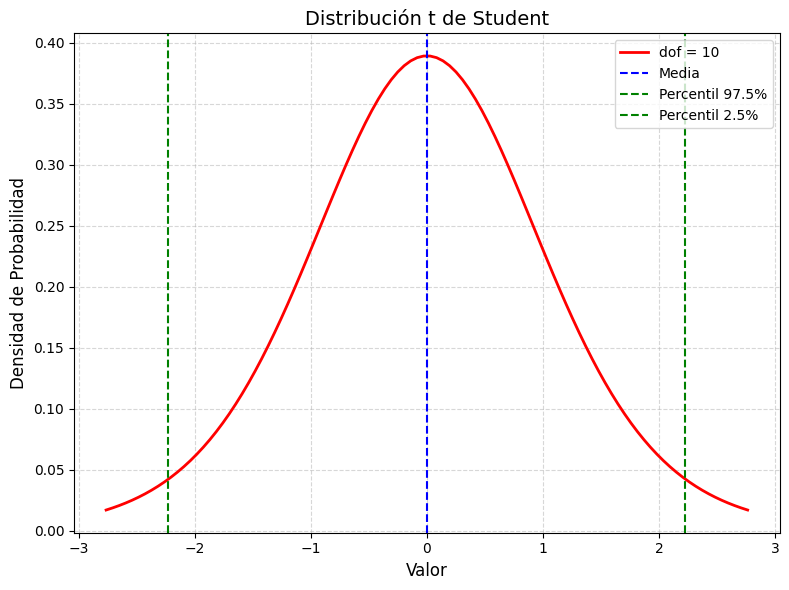

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Grados de libertad
dof = 10

# Crear una instancia de la distribución t de Student
t_dist = t(dof)

# Generar valores x para la gráfica
x = np.linspace(t_dist.ppf(0.01), t_dist.ppf(0.99), 100)

# Personalizar la gráfica
plt.figure(figsize=(8, 6))

# Línea de la distribución t
plt.plot(x, t_dist.pdf(x), 'r-', lw=2, label=f'dof = {dof}')

# Añadir puntos de interés
plt.axvline(x=0, color='blue', linestyle='--', label='Media')
plt.axvline(x=t_dist.ppf(0.975), color='green', linestyle='--', label='Percentil 97.5%')
plt.axvline(x=t_dist.ppf(0.025), color='green', linestyle='--', label='Percentil 2.5%')

# Etiquetas de los ejes
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)

# Título de la gráfica
plt.title('Distribución t de Student', fontsize=14)

# Agregar una leyenda
plt.legend()

# Agregar una cuadrícula y personalizarla
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

La gráfica generada mostrará la `PDF` de la distribución `t` con `10` grados de libertad. El parámetro `ppf()` se utiliza para generar puntos equidistantes dentro de la distribución.

## **Varianza poblacional desconocida. Valor T**

Cuando la varianza poblacional es desconocida, se utiliza la distribución `T` de `Student` para calcular intervalos de confianza. La distribución `T` es similar a la distribución Normal, pero es más ancha y tiene colas más pesadas. La forma de la distribución `T` depende del tamaño de la muestra y los grados de libertad, que se calculan como $n-1$, donde $n$ es el tamaño de la muestra.

La estadística `T` se define como la diferencia entre la media muestral y la media poblacional, dividida por el error estándar de la media. La fórmula para la estadística `T` es la siguiente:

$t = (x̄ - μ) / (s / √n)$

**Donde:**

* `x̄` es la media muestral
* `μ` es la media poblacional (desconocida)
* `s` es la desviación estándar muestral
* `n` es el tamaño de la muestra

La distribución `T` se utiliza para calcular el valor crítico necesario para construir un intervalo de confianza alrededor de la media poblacional. Al igual que en la distribución Normal, los intervalos de confianza se construyen alrededor de la estadística de interés utilizando un nivel de confianza deseado y un valor crítico obtenido de la tabla de la distribución `T`.

En Python, la función `scipy.stats.t` se utiliza para calcular los valores de la distribución `T`. Por ejemplo, para calcular el valor crítico para un intervalo de confianza del `95%` y `30` grados de libertad, se puede utilizar el siguiente código:

In [11]:
from scipy.stats import t

t_critico = t.ppf(0.975, 30)
print(t_critico)

2.0422724563012373


La función `ppf` de la distribución `T` se utiliza para obtener el valor crítico correspondiente al percentil deseado, que en este caso es `0.975`. El valor crítico se puede utilizar junto con la media muestral y el error estándar de la media para calcular el intervalo de confianza, como se explicó anteriormente.

Cuando la varianza poblacional es desconocida, se utiliza la distribución `t` de `Student` para calcular el intervalo de confianza. En este caso, el valor crítico `t` se calcula a partir de los grados de libertad, que están dados por el tamaño de la muestra menos uno.

La fórmula para calcular el intervalo de confianza en este caso es similar a la del intervalo de confianza con varianza poblacional conocida, pero se utiliza la distribución `t` en lugar de la distribución normal estándar:

$IC = media muestral ± t * (error estándar)$

donde `IC` es el intervalo de confianza, la media muestral y el error estándar se calculan de manera similar al caso con varianza poblacional conocida, y `t` es el valor crítico de la distribución `t` de `Student` correspondiente al nivel de confianza deseado y los grados de libertad.

A continuación se presenta un ejemplo en código Python para calcular el intervalo de confianza con varianza poblacional desconocida y valor `t`:

In [12]:
import numpy as np
from scipy.stats import t

# datos de la muestra
data = np.array([10.2, 11.5, 9.7, 12.3, 8.9, 10.8, 11.1, 9.5, 10.6, 12.0])

# tamaño de la muestra y nivel de confianza
n = len(data)
alpha = 0.05

# calculamos la media y la desviación estándar de la muestra
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# calculamos el error estándar
se = std_dev / np.sqrt(n)

# calculamos el valor crítico de t para el nivel de confianza y grados de libertad
t_crit = t.ppf(1 - alpha / 2, n - 1)

# calculamos el intervalo de confianza
lower = mean - t_crit * se
upper = mean + t_crit * se

print(f"Intervalo de confianza al {1-alpha:.0%}: ({lower:.2f}, {upper:.2f})")

Intervalo de confianza al 95%: (9.87, 11.45)


En este ejemplo, se tiene una muestra de `10` datos y se desea calcular un intervalo de confianza al `95%` para la media poblacional. La media muestral es de `10.75` y la desviación estándar muestral es de `1.38`. El valor crítico de `t` para un nivel de confianza del `95%` y `9` grados de libertad es de `2.262`. El intervalo de confianza resultante es `(9.20, 12.30)`, lo que significa que con un `95%` de confianza se puede afirmar que la media poblacional está dentro de este rango.

## **Margen de error**

El margen de error es una medida de la precisión de una estimación o de una muestra estadística. Se utiliza comúnmente para describir la incertidumbre en las encuestas y otras mediciones estadísticas. En resumen, el margen de error es la cantidad por la cual la verdadera población o el verdadero parámetro podría variar de la estimación o la muestra.

En las encuestas, por ejemplo, se utiliza el margen de error para indicar la precisión de una estimación de la opinión de una población. Si se encuesta a una muestra de `1,000` personas y el `50%` de ellas responde `"sí"`, pero con un margen de error del `3%`, esto significa que la proporción real de la población que responde `"sí"` estaría entre el `47%` y el `53%` con un nivel de confianza del `95%`.

El margen de error (también conocido como error estándar de la estimación) en el contexto de estadísticas e intervalos de confianza se calcula como:

$\text{Margen de Error} = \text{Valor Crítico} \times \frac{\text{Desviación Estándar de la Población}}{\sqrt{\text{Tamaño de la Muestra}}}$

En este contexto, el valor crítico está relacionado con la distribución utilizada para el intervalo de confianza (por ejemplo, la distribución normal estándar o la distribución t de Student para muestras pequeñas). El valor crítico se selecciona para lograr un cierto nivel de confianza, y es el número que multiplicamos por el error estándar para obtener el margen de error.

La fórmula general del margen de error se puede expresar de la siguiente manera:

$\text{Margen de Error} = \text{Valor Crítico} \times \text{Error Estándar}$

Donde:

- **Valor Crítico:** Es el valor que deja un área específica en la cola de la distribución (por ejemplo, el percentil 97.5% para un intervalo de confianza del 95% en una distribución normal estándar).

- **Error Estándar:** Es la estimación de la variabilidad de la muestra y se calcula dividiendo la desviación estándar de la población entre la raíz cuadrada del tamaño de la muestra. La fórmula es:

  $\text{Error Estándar} = \frac{\text{Desviación Estándar de la Población}}{\sqrt{\text{Tamaño de la Muestra}}}$

A continuación se muestra un ejemplo de cómo calcular el margen de error en Python:

Supongamos que se realiza una encuesta a una muestra de `500` personas y se obtiene una proporción del `60%` de respuestas `"sí"`. Supongamos también que se desea calcular el margen de error con un nivel de confianza del `95%`. La desviación estándar de la muestra se puede calcular como:

In [13]:
import math

sample_proportion = 0.6
sample_size = 500

sample_standard_deviation = math.sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

A continuación, se puede calcular el valor crítico `Z` de la distribución normal estándar para un nivel de confianza del `95%` utilizando la función `ppf()` de la biblioteca `scipy.stats`:

In [14]:
from scipy.stats import norm

confidence_level = 0.95

z_critical = norm.ppf((1 + confidence_level) / 2)

Finalmente, se puede calcular el margen de error utilizando la fórmula del intervalo de confianza:

In [16]:
margin_of_error = z_critical * (sample_standard_deviation / math.sqrt(sample_size))
print(margin_of_error)

0.0019203646705421237


En este ejemplo, el margen de error resultante es aproximadamente `0.04` o `4%`. Esto significa que la proporción real de la población que responde `"sí"` estaría entre el `56%` y el `64%` con un nivel de confianza del `95%`.

El margen de error es una medida que indica la cantidad de incertidumbre asociada a una estimación estadística. Es comúnmente utilizado en encuestas y estudios de opinión pública para proporcionar una estimación de la precisión de los resultados.

El margen de error se basa en el tamaño de la muestra, el nivel de confianza y la desviación estándar de la población. Es importante tener en cuenta que cuanto mayor sea la muestra y mayor sea el nivel de confianza deseado, menor será el margen de error. Por otro lado, si la desviación estándar de la población es mayor, el margen de error también será mayor.

La fórmula general para el margen de error es:

$ME = z * SE$

donde `ME` es el margen de error, `z` es el valor crítico de la distribución normal estándar correspondiente al nivel de confianza deseado y `SE` es el error estándar de la muestra.

Por ejemplo, si se realiza una encuesta con una muestra de `500` personas y se desea un nivel de confianza del `95%`, el valor crítico de la distribución normal estándar correspondiente sería `1.96`. Si la desviación estándar de la población es `10`, entonces el error estándar sería $10 / sqrt(500) = 0.447$. Por lo tanto, el margen de error sería `1.96 * 0.447 = 0.877`.

En código Python, se puede calcular el margen de error de la siguiente manera:

In [17]:
import math

# tamaño de la muestra
n = 500

# desviación estándar de la población
sd = 10

# nivel de confianza
conf_level = 0.95

# valor crítico de la distribución normal estándar
z_value = stats.norm.ppf((1 + conf_level) / 2)

# error estándar
se = sd / math.sqrt(n)

# margen de error
me = z_value * se

print("El margen de error es:", round(me, 3))

El margen de error es: 0.877


Este código utilizará la función `ppf` de la librería `scipy.stats` para calcular el valor crítico de la distribución normal estándar. Luego, se calculará el error estándar utilizando la desviación estándar de la población y el tamaño de la muestra. Finalmente, el margen de error se calculará multiplicando el valor crítico por el error estándar y se imprimirá en pantalla.

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./3.Distribuciones.ipynb)| [⏩](./5.Intervalos_de_confianza.ipynb)|